# ADF 
u were here
- adf
- acf

try with stationary and non-stationary

## Sample code
https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html


 # Define constants

In [1]:
MAX_SAMPLES=1000
START=10
PLOT_SIZE=(16,10)

# Define common functions

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

In [3]:

#randvalues=np.random.standard_normal(size=MAX_SAMPLES)

def produce_random_walk(sample_count:int, multiplier:float, drift=0.0)->np.ndarray:
    walk_values=np.zeros(shape=[sample_count] ,dtype=float)
    walk_values[0]=drift
    for index in range(1,len(walk_values)):
        previous=walk_values[index-1]
        delta=(random.random() -0.5)*2 #between -1 and 1
        #walk_values[index]=previous + multiplier*delta
        walk_values[index]=previous*multiplier + delta + drift
    return walk_values

In [4]:
def plot_walk(values:np.ndarray, title: str):
    max_y = max(values)
    plt.figure(figsize=PLOT_SIZE)
    plt.grid()
    plt.ylim(-3*max_y,3*max_y)
    plt.title(title)
    plt.plot(range(len(values)), values)   

In [5]:


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


# Multiplier - 0.5 (Stationary)

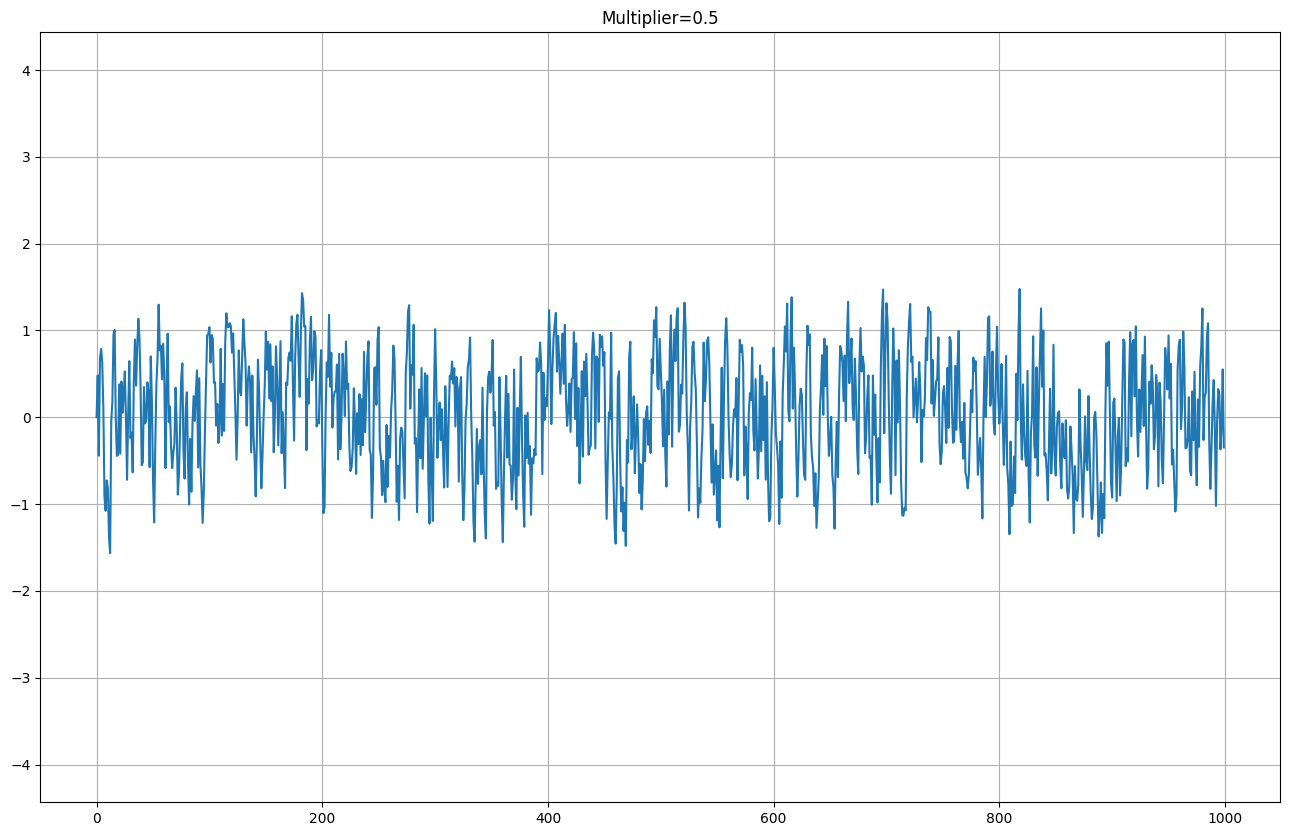

In [6]:
mpy=0.5
values_05=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=mpy)
plot_walk(values=values_05, title=f"Multiplier={mpy}")


## ADF 

In [8]:
adf_test(timeseries=values_05)

Results of Dickey-Fuller Test:
Test Statistic                -1.820303e+01
p-value                        2.403194e-30
#Lags Used                     0.000000e+00
Number of Observations Used    9.990000e+02
Critical Value (1%)           -3.436913e+00
Critical Value (5%)           -2.864437e+00
Critical Value (10%)          -2.568313e+00
dtype: float64


## ACF Plot 

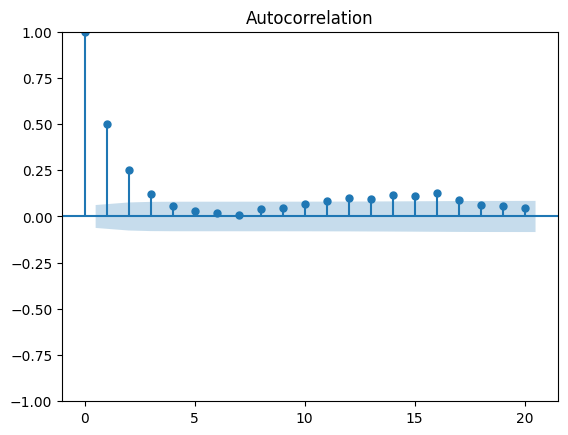

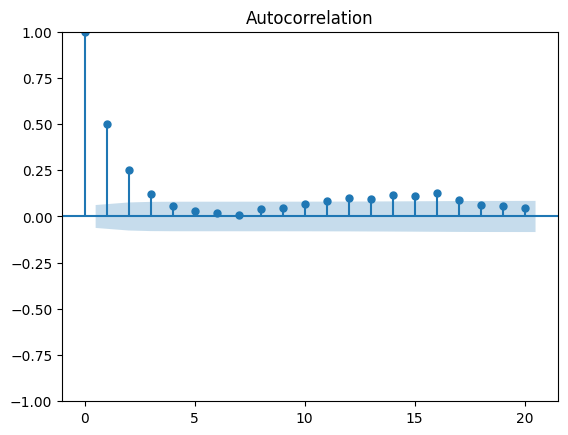

In [13]:
plot_acf(values_05, lags=20)

# Multiplier 1.0 (non-stationary)

Results of Dickey-Fuller Test:
Test Statistic                  -1.788807
p-value                          0.386033
#Lags Used                       3.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


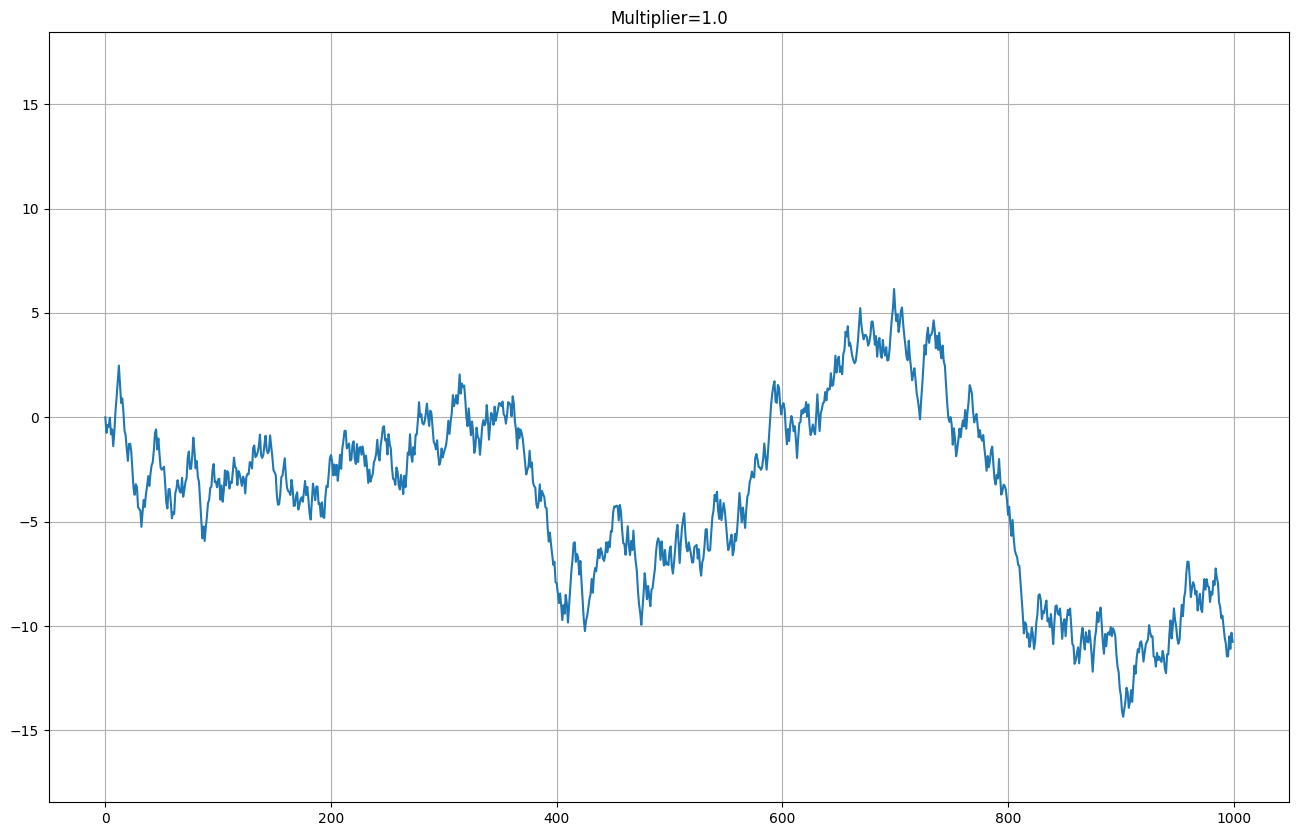

In [9]:
mpy=1.0
values_10=produce_random_walk(sample_count=MAX_SAMPLES, multiplier=mpy)
plot_walk(values=values_10, title=f"Multiplier={mpy}")
adf_test(timeseries=values_10)

## ADF 

In [10]:
adf_test(timeseries=values_10)

Results of Dickey-Fuller Test:
Test Statistic                  -1.788807
p-value                          0.386033
#Lags Used                       3.000000
Number of Observations Used    996.000000
Critical Value (1%)             -3.436933
Critical Value (5%)             -2.864446
Critical Value (10%)            -2.568317
dtype: float64


## ACF Plot

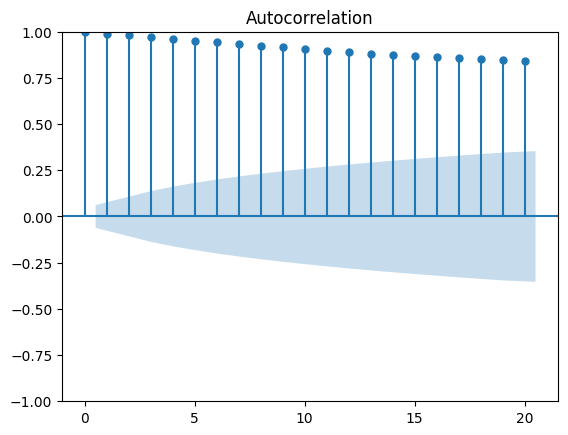

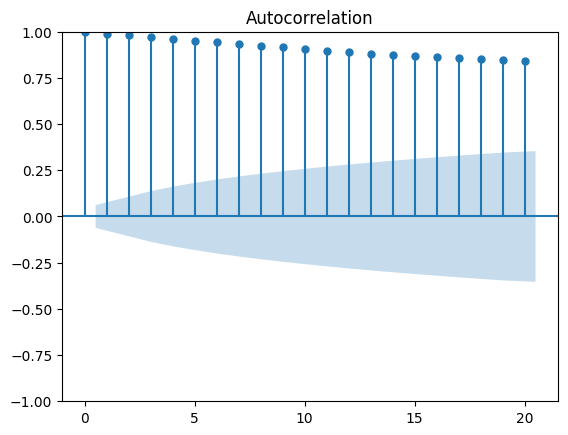

In [12]:
plot_acf(values_10 ,lags=20)

# Flat and straight horizontal line

In [14]:
walk_values_flat_line=np.ones(shape=[MAX_SAMPLES] ,dtype=float)

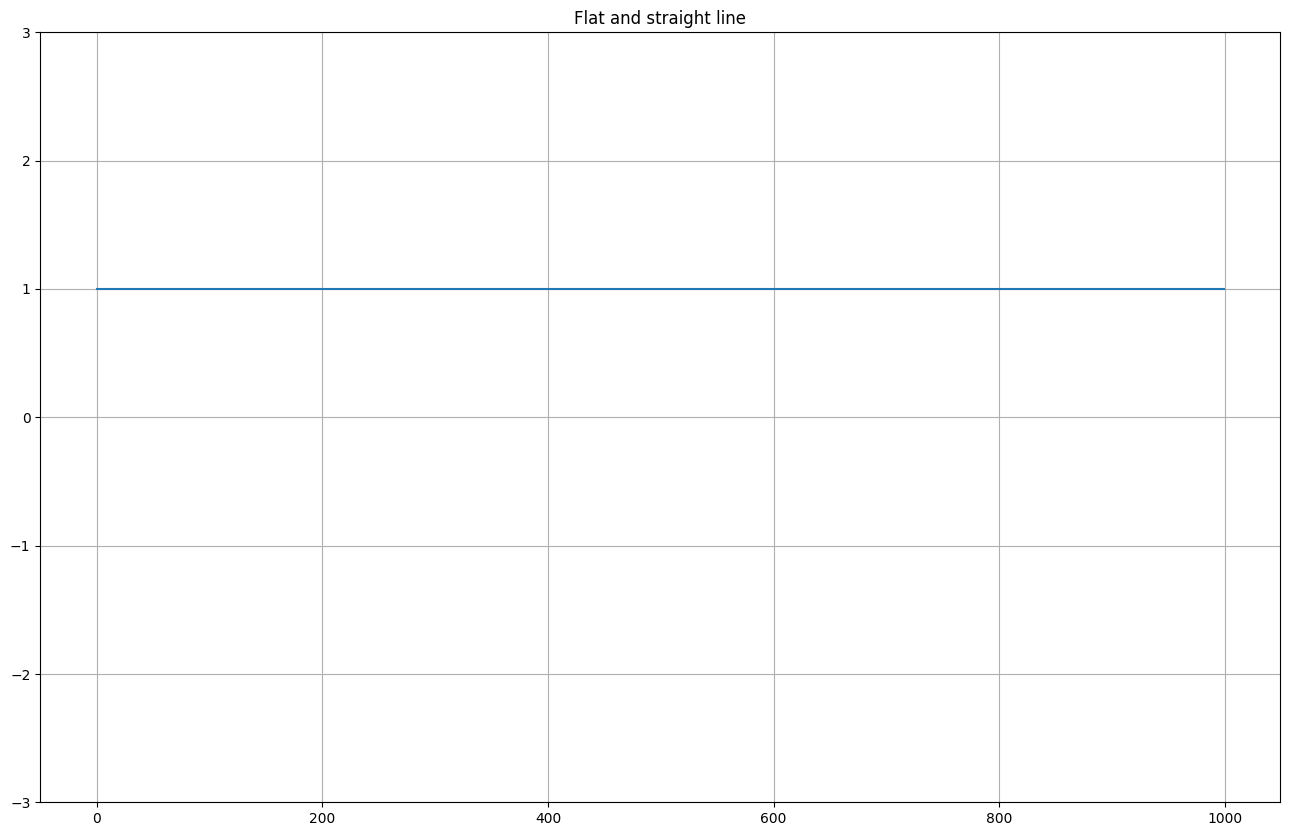

In [17]:
plot_walk(values=walk_values_flat_line, title=f"Flat and straight line")


## ADF

In [18]:
adf_test(timeseries=walk_values_flat_line)

Results of Dickey-Fuller Test:


ValueError: Invalid input, x is constant

## ACF Plot

C:\Users\saurabhd\MyTrials\Python\any-python\.venv\lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: divide by zero encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\saurabhd\MyTrials\Python\any-python\.venv\lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


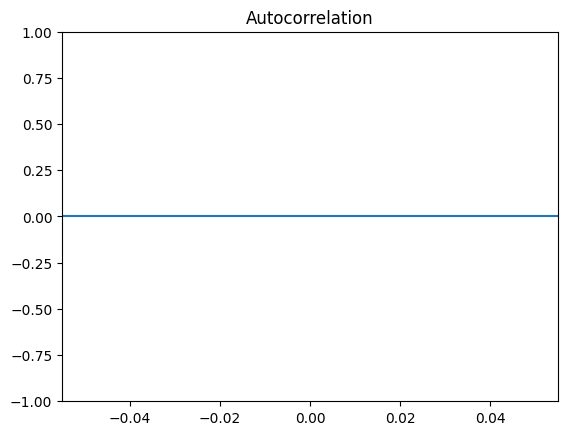

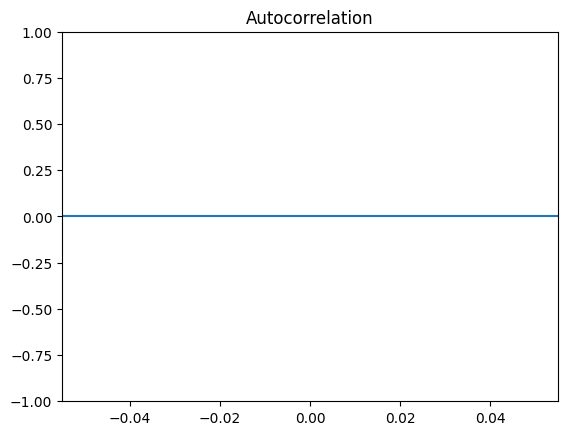

In [37]:
plot_acf(walk_values_flat_line ,lags=20)

# Slowly rising straight line YOU WERE HERE, HOW TO GENREATE A LINE

In [20]:
all_x=np.linspace(start=0, stop=MAX_SAMPLES, num=MAX_SAMPLES)
all_x[:10]

array([0.        , 1.001001  , 2.002002  , 3.003003  , 4.004004  ,
       5.00500501, 6.00600601, 7.00700701, 8.00800801, 9.00900901])

In [31]:
line_equation = lambda x : 0.3*x + 1.0
vfunc = np.vectorize(line_equation)
walk_values_slow_rising = vfunc(all_x)
all_x[:10],walk_values_slow_rising[:10]

(array([0.        , 1.001001  , 2.002002  , 3.003003  , 4.004004  ,
        5.00500501, 6.00600601, 7.00700701, 8.00800801, 9.00900901]),
 array([1.       , 1.3003003, 1.6006006, 1.9009009, 2.2012012, 2.5015015,
        2.8018018, 3.1021021, 3.4024024, 3.7027027]))

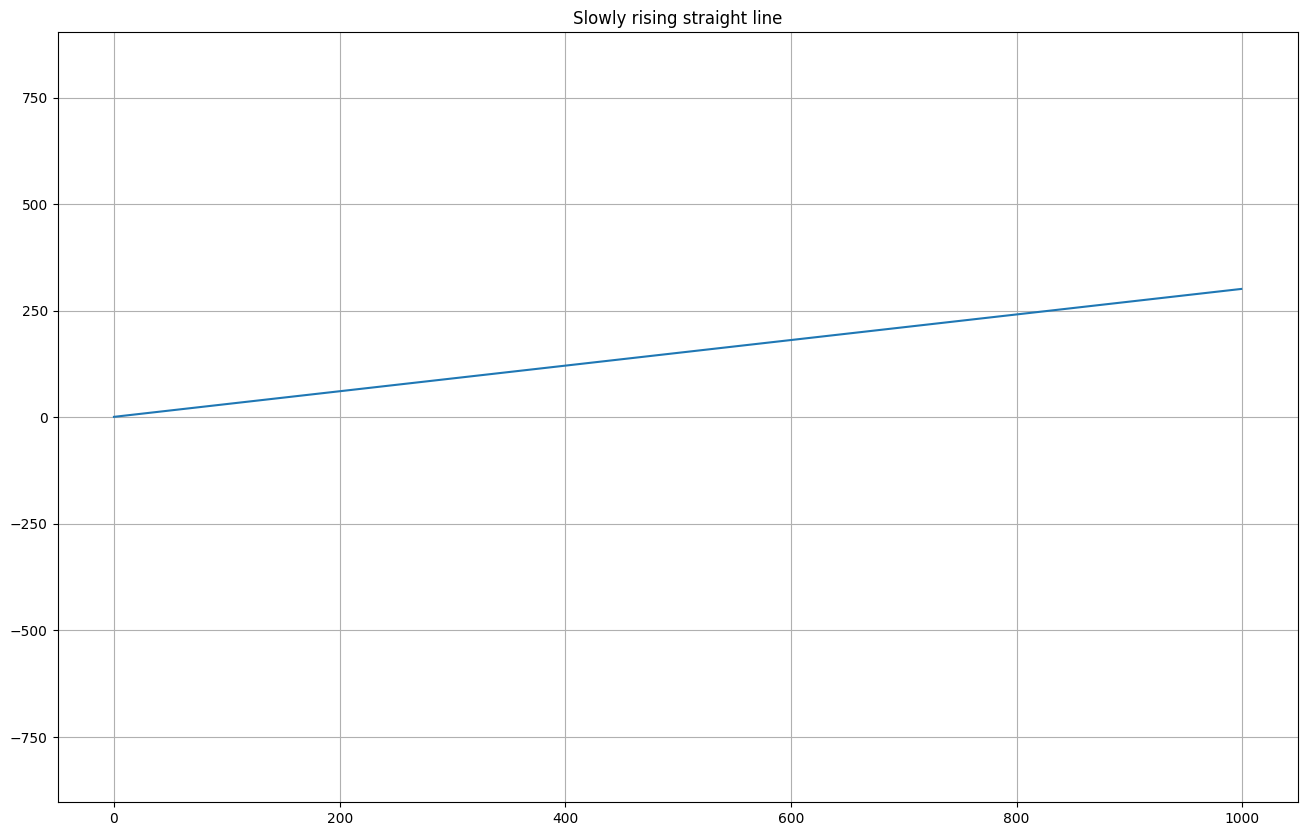

In [39]:
plot_walk(values=walk_values_slow_rising, 
          title=f"Slowly rising straight line")


## ADF

In [40]:
adf_test(timeseries=walk_values_slow_rising)

Results of Dickey-Fuller Test:
Test Statistic                  -0.146913
p-value                          0.944561
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


## ACF Plot

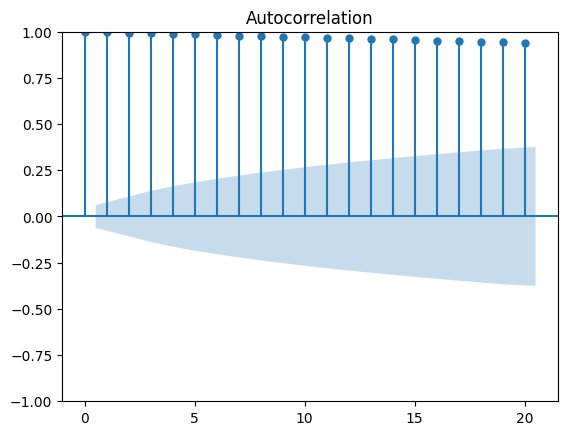

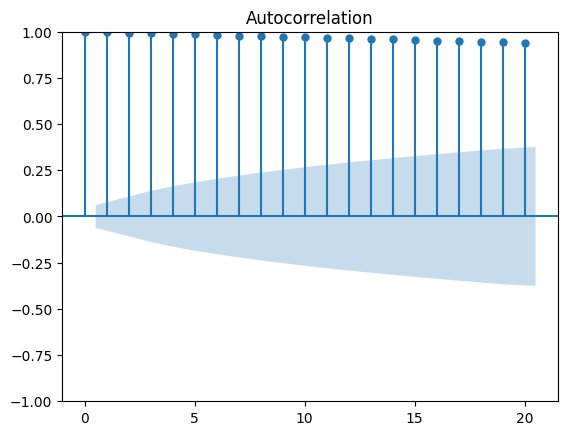

In [41]:
plot_acf(walk_values_slow_rising ,lags=20)